In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
model_path = '../pickle/SupportVectorMachine/gpt35_model.pkl'

In [4]:
data = pd.read_csv('../../preprocessing/StorePreprocessed/GPT35csv.csv')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data["text"], data["label"], test_size=0.2, random_state=42, stratify=data["label"])

In [6]:
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(4, 4), max_features=11000)  # dynamic range of features

In [7]:
# Remove NaN values from the split data
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]


X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [8]:
param_grid_svm = {
    'C': [6.0, 2.0, 1.0, 0.95, 0.9, 0.8]
}

In [9]:
svm = SVC(kernel="linear")

In [10]:
if os.path.exists(model_path):

    with open(model_path, 'rb') as file:
        svm_best = pickle.load(file)
else:
    grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
    grid_svm.fit(X_train, y_train)
    svm_best = grid_svm.best_estimator_
y_pred_svm = svm_best.predict(X_test)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [11]:
# Evaluate SVM
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      2000
           1       0.95      0.89      0.92      2000

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000

SVM Accuracy: 0.919


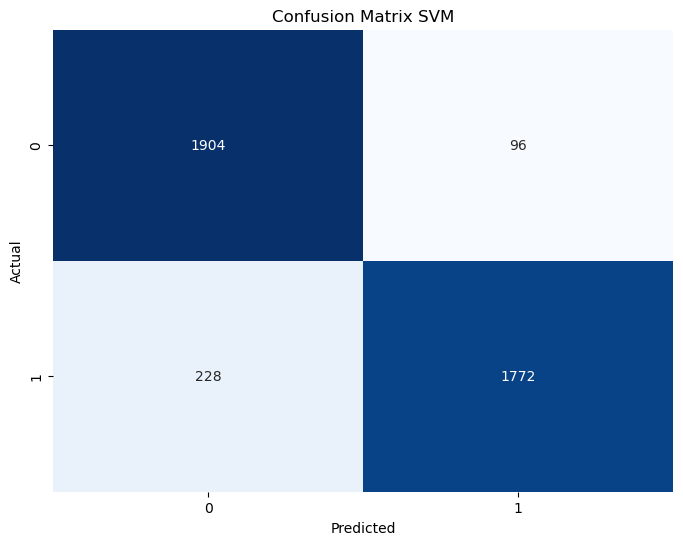

In [12]:
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../../evaluation/GPT35_Evaluation/Confusion_Matrix_SVM.png')
plt.show()

In [13]:
with open(model_path, 'wb') as file:
    pickle.dump(svm_best, file)